In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [19]:
collection_file = "./data/0_collection.csv"

In [20]:
df = pd.read_csv(collection_file, sep='\t')
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
# df

In [22]:
from __future__ import print_function

import librosa
import librosa.display
import IPython.display
import numpy as np
import math

In [38]:
audio_file = './data/audio/rap/16. Lay Me Bare.mp3'
rate = 44100
mono = True
n_components = 18
count_shrink_freq = 50000

In [39]:
# Load the track in mono
y, sr = librosa.load(audio_file, mono=mono, sr=rate)

In [40]:
start_second = 45
cut_amount = 20

y = y[start_second*sr:start_second*sr+cut_amount*sr]

In [41]:
# IPython.display.Audio(data=y, rate=sr)

In [42]:
# Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by NMF
components, activations = librosa.decompose.decompose(S, n_components=n_components, sort=True)

In [43]:
len(y)

882000

In [44]:
y_result = []

for i in range(0, len(activations)):
    # Reconstruct a spectrogram by the outer product of component k and its activation
    D_k = np.multiply.outer(components[:, i], activations[i])

    # invert the stft after putting the phase back in
    y_k = librosa.istft(D_k * phase)
    # y_k = y_k[::math.ceil(len(y_k)/count_shrink_freq)]
    
    y_result.append(y_k)

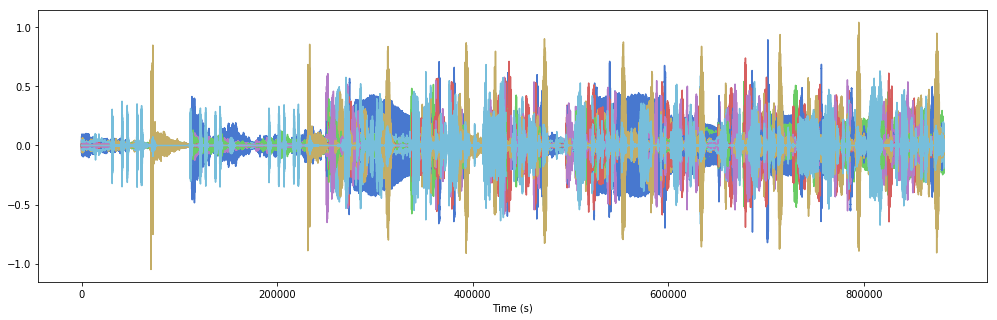

In [45]:
#time = np.arange(0, float(y), 1) / sr 

plt.figure(figsize=(17, 5))
for ty in y_result: 
    plt.plot(ty)
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [37]:
len(ty)

881664

In [35]:
len(y)

882000

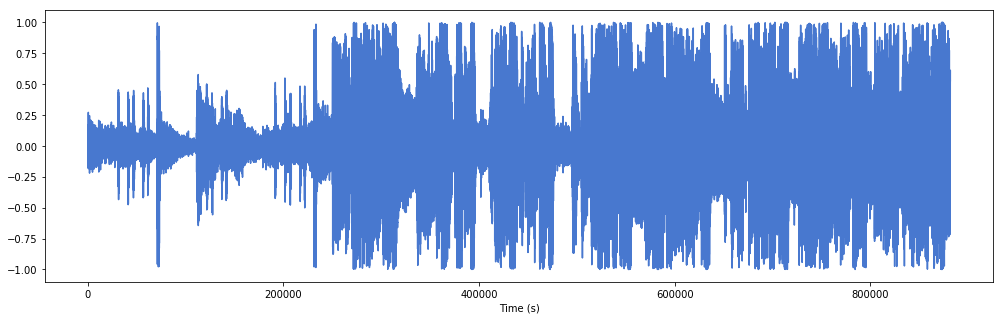

In [36]:
# time = np.arange(0, float(y.shape[0]), 1) / sr 

plt.figure(figsize=(17, 5))
plt.plot(y)
plt.xlabel('Time (s)')
plt.legend()
plt.show()